<a href="https://colab.research.google.com/github/eseo5325/DS220-Final-Project/blob/main/Course_Project_Ethan_Seo_and_Andrew_Cavanaugh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all packages and mounting csv file

In [ ]:
!pip install datascience

     |████████████████████████████████| 69 kB 3.7 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79809 sha256=b12f1fdd04a7d19d067392bc7102a5fa8fdc12050713b4bb0792d06495be6786
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
from datascience import *
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
import seaborn as sns
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/vgsales.csv'

Mounted at /content/drive


In [ ]:
vgsales_df = pd.read_csv(path)

In [ ]:
vgsales_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Preprocessing

In [ ]:
vgsales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
vgsales_df = vgsales_df.dropna().reset_index(drop=True)
vgsales_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Data Visuals and Analysis

# Publishers:

In [ ]:
publishers = vgsales_df[['Publisher']].value_counts().head(15)
publishers

Publisher                             
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
dtype: int64

In [ ]:
publisher_dt = vgsales_df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
publisher_dt = publisher_dt.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
publisher_dt

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,815.75,418.30,454.99,95.19,1784.43
138,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
21,Activision,426.01,213.72,6.54,74.79,721.41
455,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
524,Ubisoft,252.81,163.03,7.33,50.16,473.54
...,...,...,...,...,...,...
147,Epic Games,0.01,0.00,0.00,0.00,0.01
389,Paradox Development,0.00,0.01,0.00,0.00,0.01
421,Rain Games,0.00,0.01,0.00,0.00,0.01
45,Ascaron Entertainment,0.00,0.01,0.00,0.00,0.01


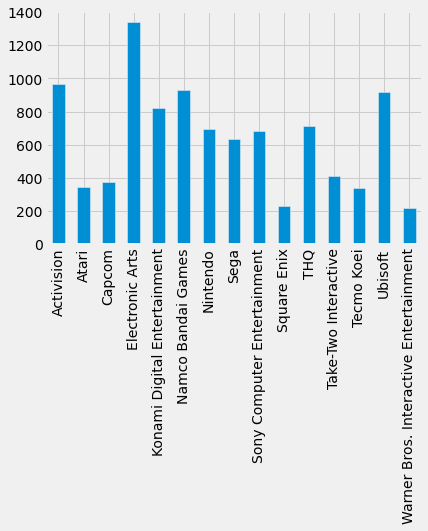

In [ ]:
vgsales_df['Publisher'].value_counts().head(15).sort_index().plot.bar()

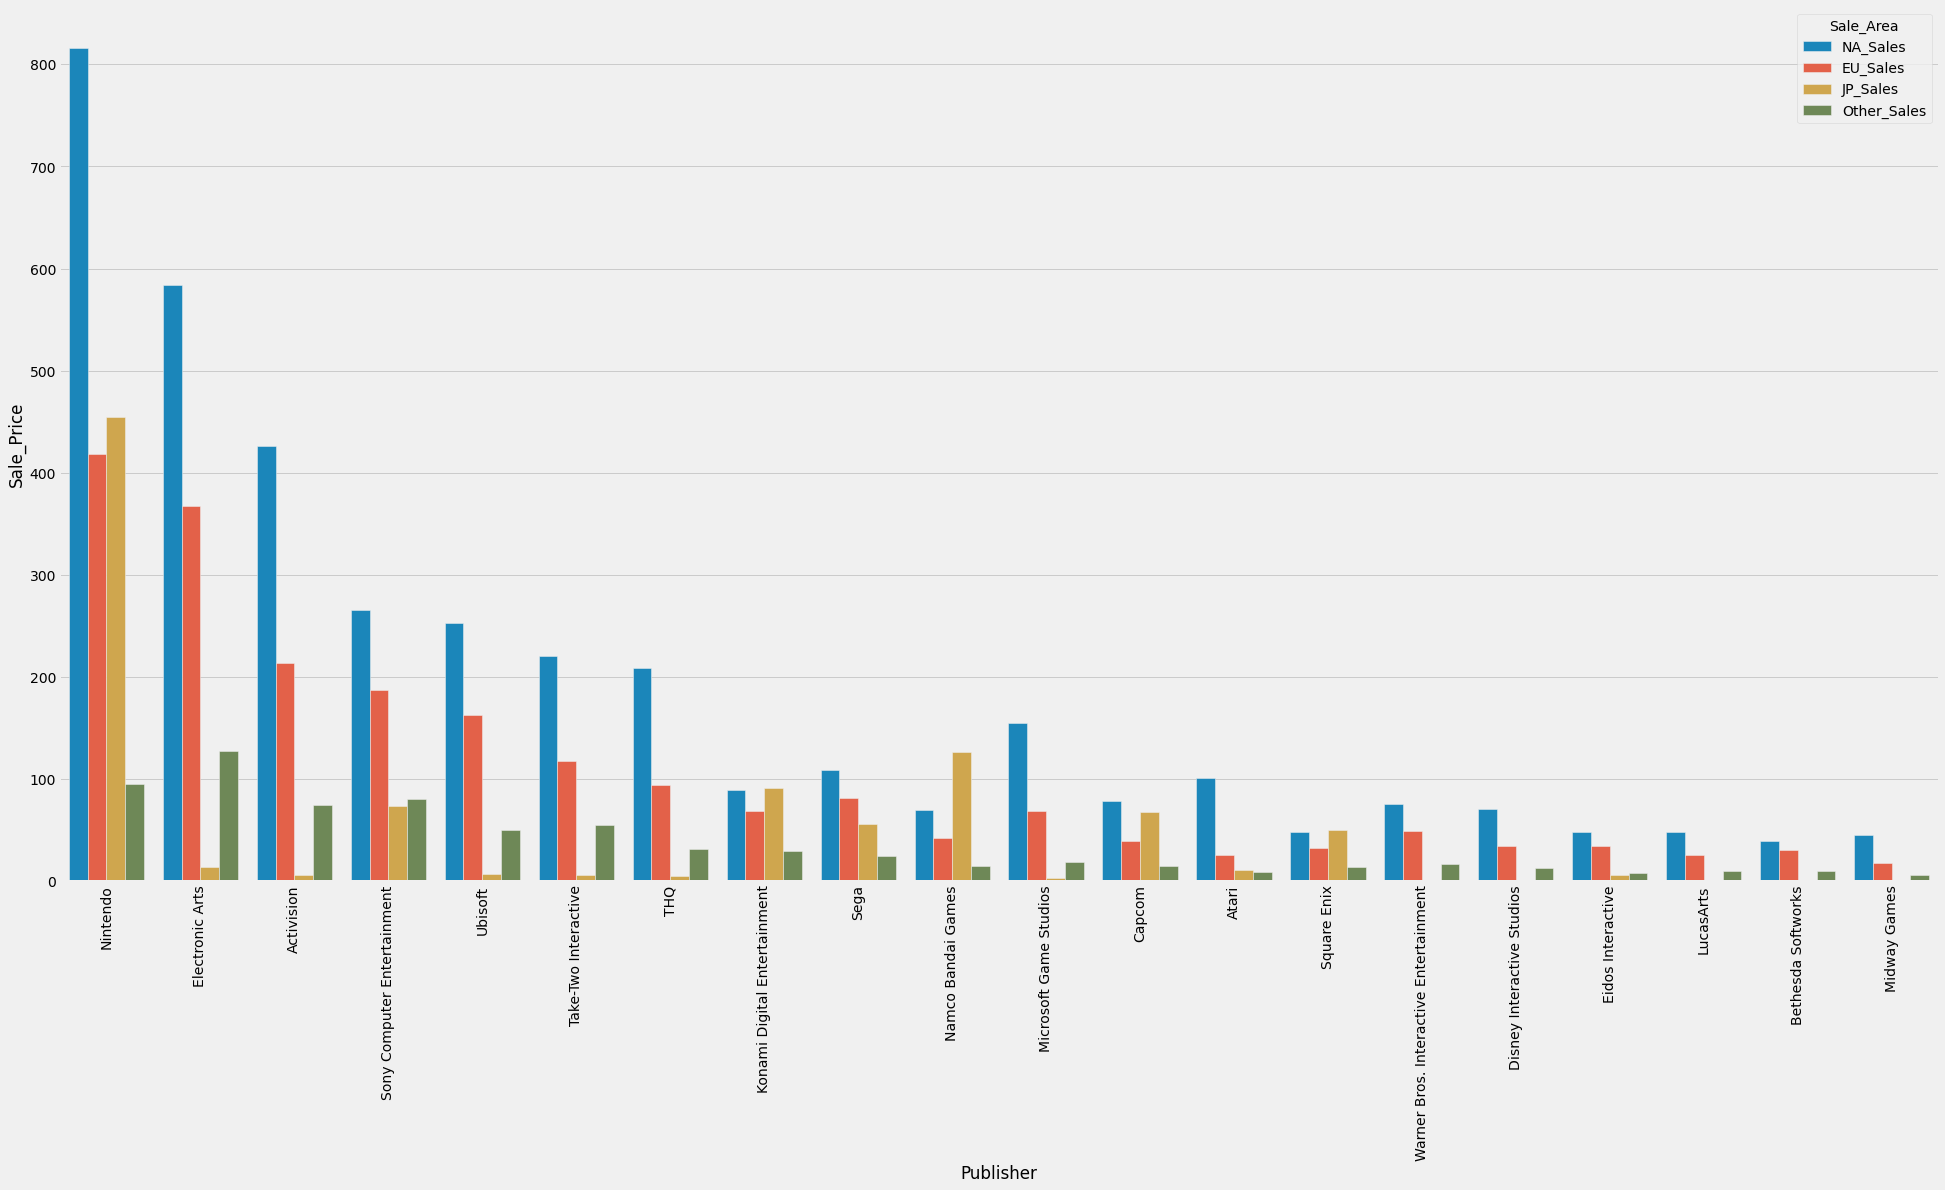

In [ ]:
publisher_dt = vgsales_df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
publisher_dt = publisher_dt.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
publisher_dt = publisher_dt.head(20)
publisher_dt = pd.melt(publisher_dt, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=publisher_dt)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# Platforms:

In [ ]:
vgsales_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
plat_dt = vgsales_df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plat_dt = plat_dt.groupby(by=['Platform']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
plat_dt

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,572.92,332.63,137.54,190.47,1233.46
28,X360,594.33,278.00,12.30,84.67,969.60
17,PS3,388.90,340.47,79.21,140.81,949.35
26,Wii,497.37,264.35,68.28,79.20,909.81
4,DS,388.53,194.05,175.02,60.29,818.91
15,PS,334.71,212.38,139.78,40.69,727.39
6,GBA,178.43,72.49,46.56,7.51,305.62
19,PSP,107.09,67.16,75.89,41.52,291.71
18,PS4,96.80,123.70,14.30,43.36,278.10
13,PC,92.04,137.35,0.17,24.33,254.70


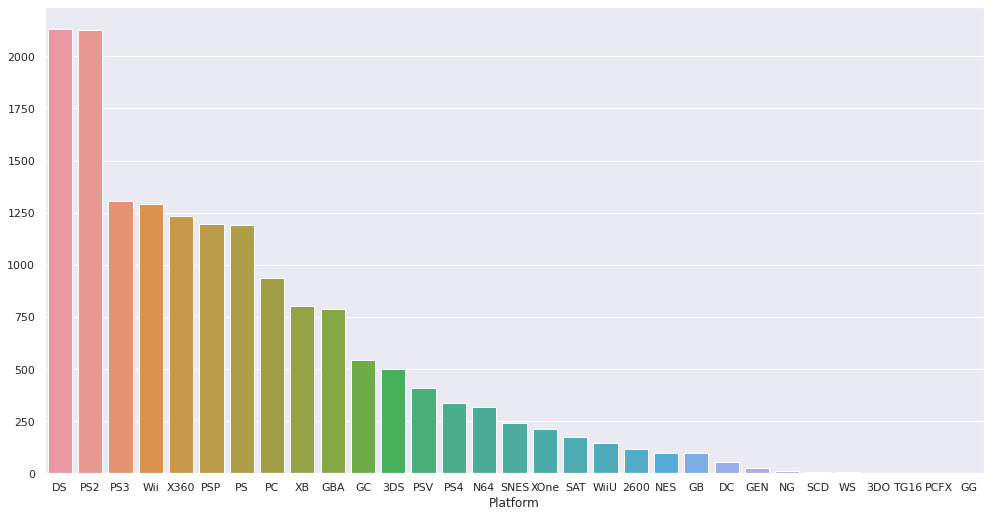

In [ ]:
platGenre = pd.crosstab(vgsales_df.Platform,vgsales_df.Genre)
plat_total = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
sns.barplot(x = plat_total.index, y = plat_total.values, orient='v')
plt.title = "The amount of games per platform"
plt.ylabel = "Number of Games"
plt.xlabel = "Platforms"
plt.show()

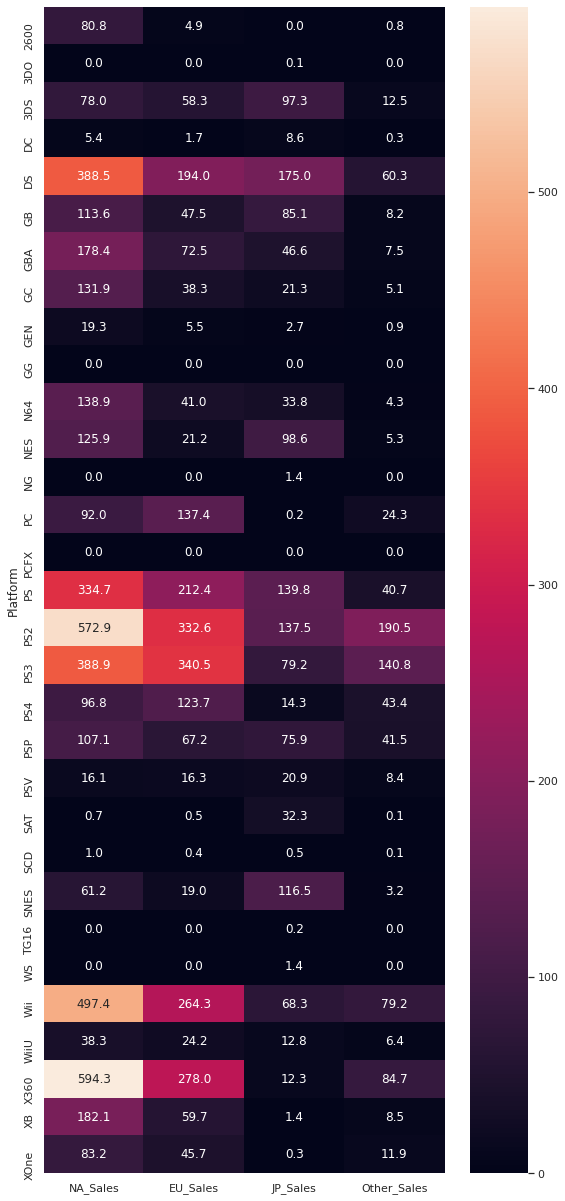

In [ ]:
PlatformGroup = vgsales_df.groupby(['Platform']).sum().loc[:, 'NA_Sales':'Global_Sales']
plt.figure(figsize=(8, 20))
sns.set(font_scale=1) 
sns.heatmap(PlatformGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.show()

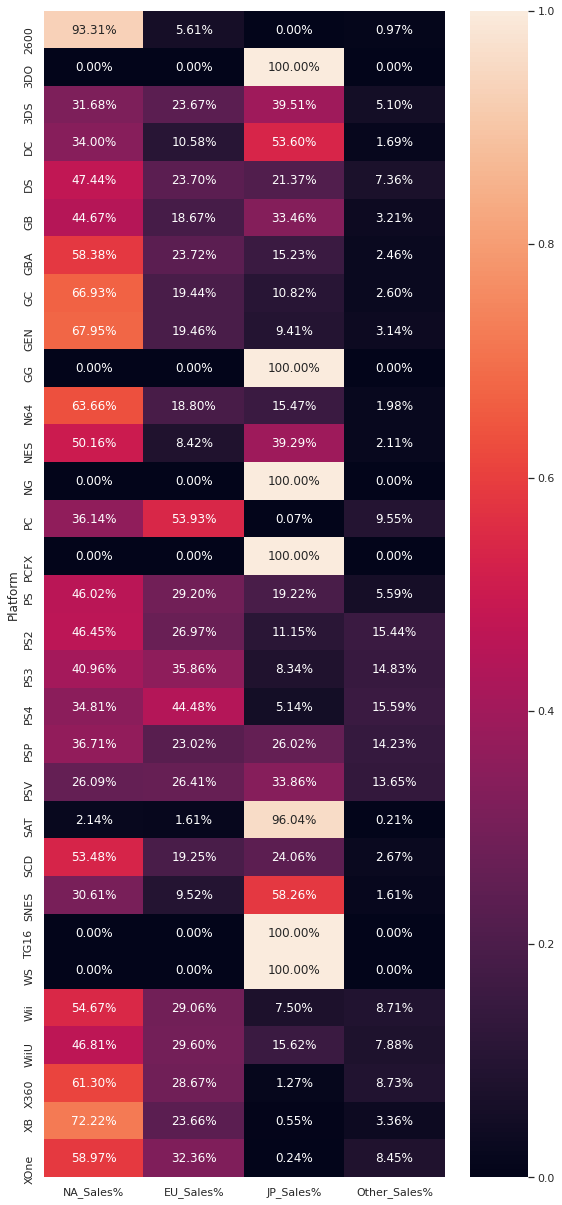

In [ ]:
PlatformGroup['NA_Sales%'] = PlatformGroup['NA_Sales']/PlatformGroup['Global_Sales']
PlatformGroup['EU_Sales%'] = PlatformGroup['EU_Sales']/PlatformGroup['Global_Sales']
PlatformGroup['JP_Sales%'] = PlatformGroup['JP_Sales']/PlatformGroup['Global_Sales']
PlatformGroup['Other_Sales%'] = PlatformGroup['Other_Sales']/PlatformGroup['Global_Sales']
plt.figure(figsize=(8, 20))
sns.set(font_scale=1)
sns.heatmap(PlatformGroup.loc[:,'NA_Sales%':'Other_Sales%'], annot=True, fmt = '.2%')
plt.show()

In [ ]:
vgsales_df['Platform'].sort_index().value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

# Genre:



In [ ]:
vgsales_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
genre_dt = vgsales_df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre_dt = genre_dt.groupby(by=['Genre']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
genre_dt

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.77,516.48,158.65,184.92,1722.84
10,Sports,670.09,371.34,134.76,132.65,1309.24
8,Shooter,575.16,310.45,38.18,101.90,1026.20
7,Role-Playing,326.50,187.57,350.29,59.38,923.83
4,Platform,445.99,200.65,130.65,51.51,829.13
3,Misc,396.92,211.77,106.67,73.92,789.87
6,Racing,356.93,236.31,56.61,76.68,726.76
2,Fighting,220.74,100.00,87.15,36.19,444.05
9,Simulation,181.78,113.02,63.54,31.36,389.98
5,Puzzle,122.01,50.52,56.68,12.47,242.21


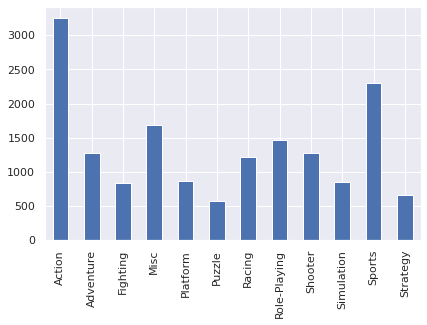

In [ ]:
vgsales_df['Genre'].value_counts().head(15).sort_index().plot.bar()

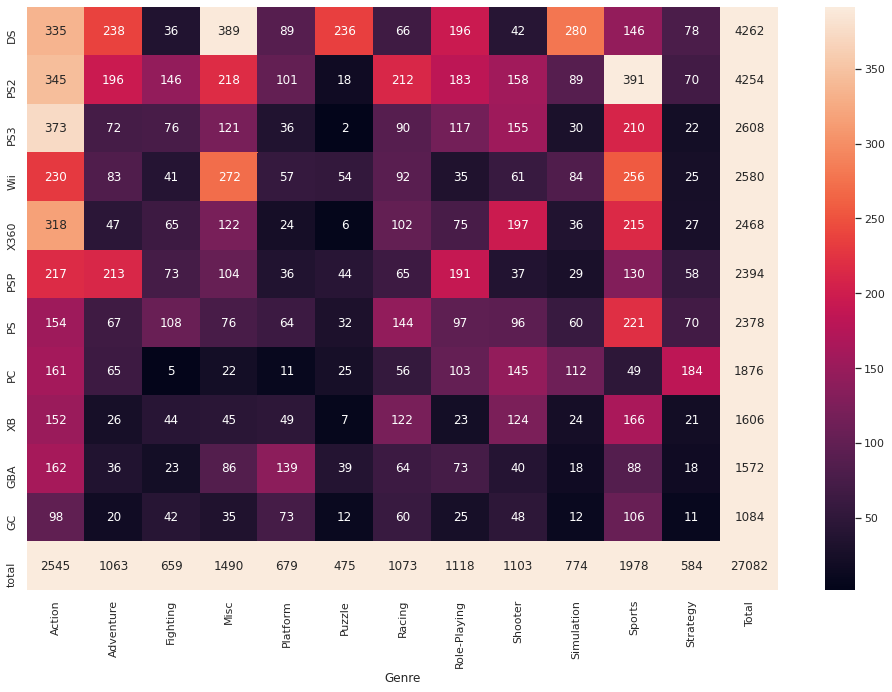

In [ ]:
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

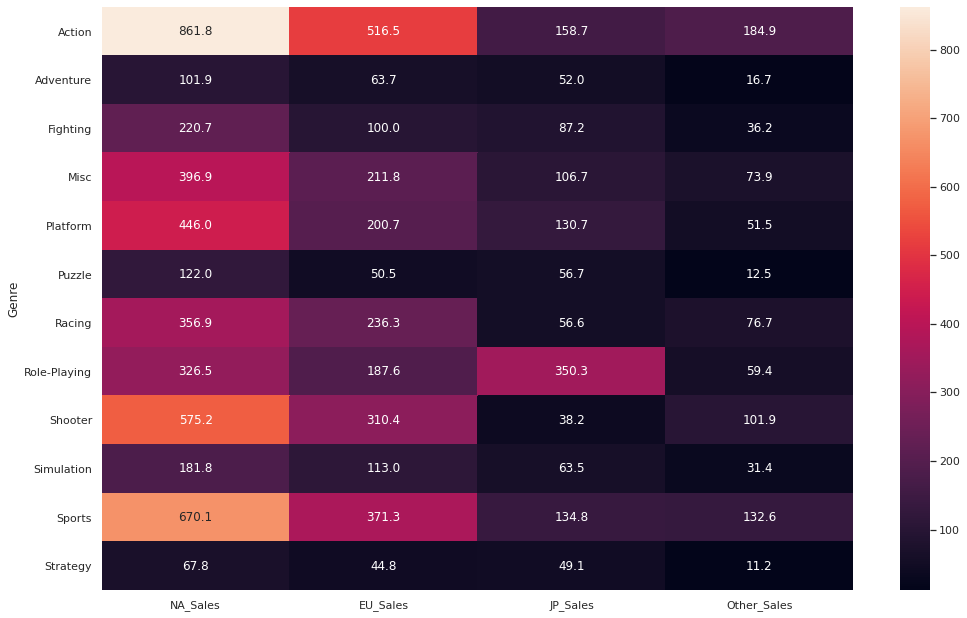

In [ ]:
GenreGroup = vgsales_df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.show()

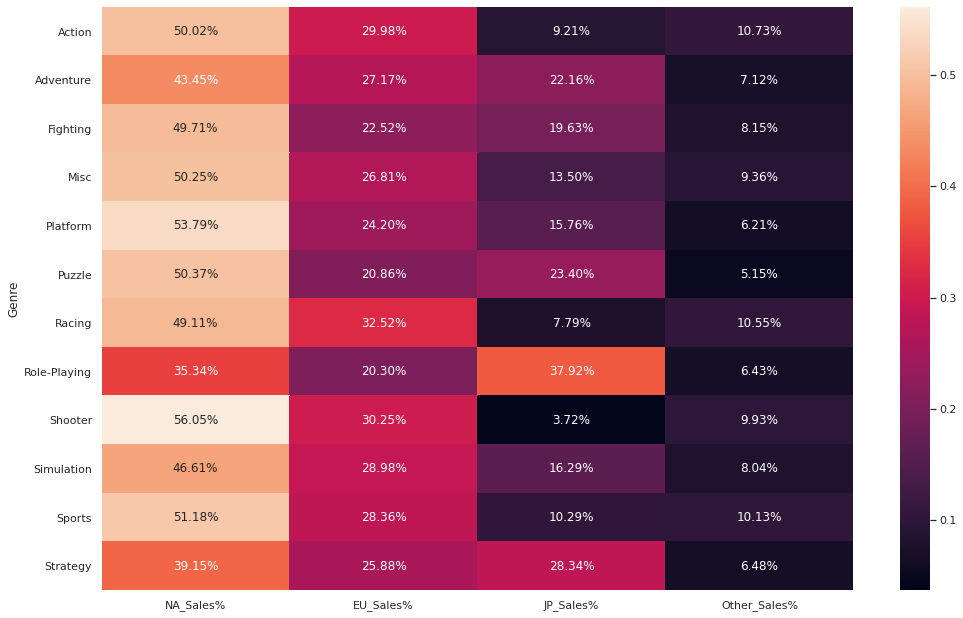

In [ ]:
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], annot=True, fmt = '.2%')
plt.show()